### What is Logistic Regression?
###### Logistic Regression is a “Supervised machine learning” algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Education\Desktop\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### CP- chest pain type (0,1,2)
### Trestbps - resting blood pressure (in mm Hg on admission to the hospital)
### chol- serum cholestoral in mg/dl
### fbs	- (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
### thalach - maximum heart rate achieved
### exang- exercise induced angina
### oldpeak- ST depression induced by exercise relative to rest
### Slope - the slope of the peak exercise ST segment
### ca - number of major vessels (0-3) colored by flourosopy
### thal - A blood disorder called thalassemia 1 = normal; 2 = fixed defect; 3 = reversable defect

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


[Text(0.5, 0, '')]

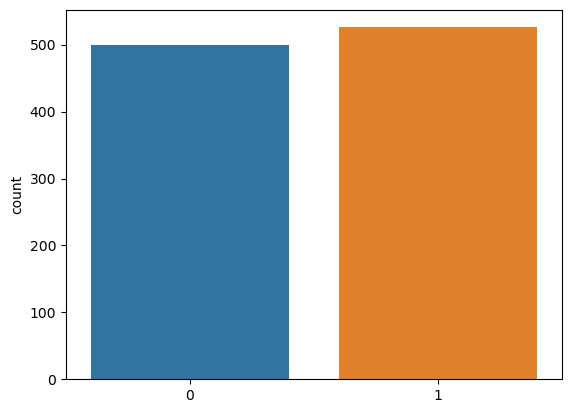

In [7]:
sns.countplot(x="target", data=df).set(xlabel=None)


### Above graph is showing that the data is class balance data.

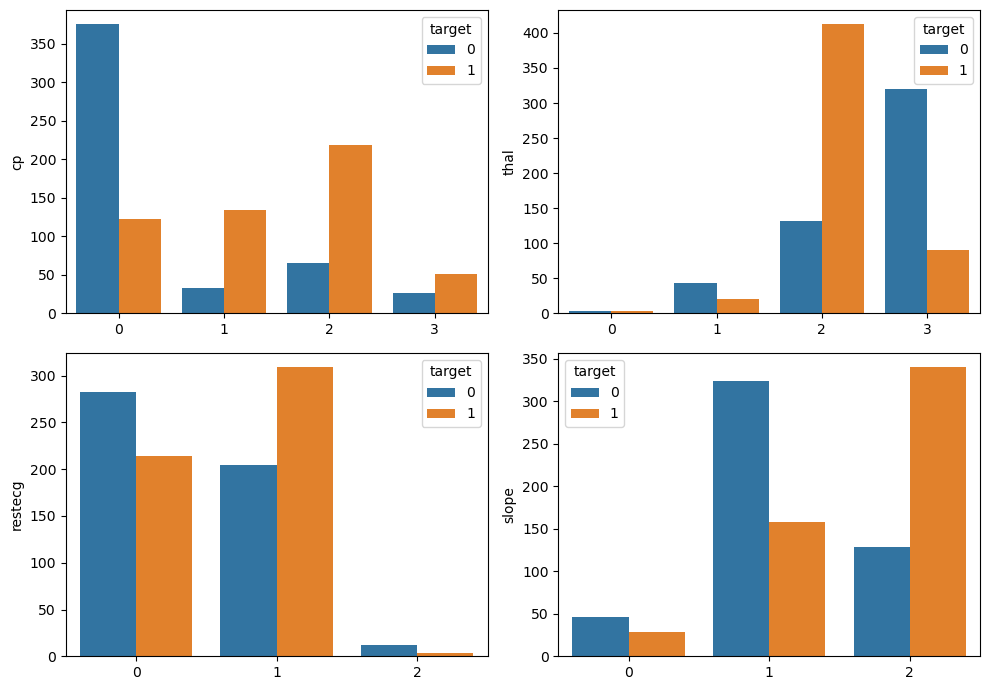

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(10, 7))

for idx, feat in enumerate(['cp', 'thal', 'restecg', 'slope']):
    ax = axes[idx//2, idx % 2]
    sns.countplot(x=feat, hue="target", data=df, ax=ax);
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

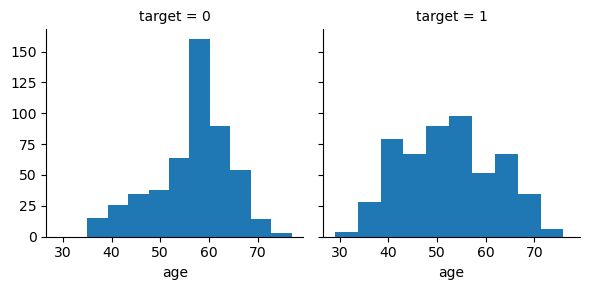

In [9]:
g = sns.FacetGrid(data=df[df["age"].notna()], col="target")
g.map(plt.hist, "age")

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_trainN,x_test,y_trainN,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [12]:
x_train,x_cv,y_train,y_cv = train_test_split(x_trainN,y_trainN,test_size=0.2,random_state=2)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf1 = LogisticRegression()

In [15]:
clf1.fit(x_train,y_train)

C:\Users\Education\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_predcv = clf1.predict(x_cv)

### Sigmoid function 

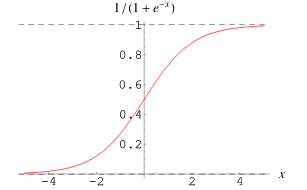

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred_train1 = clf1.predict(x_train,)
print("Accuracy of Logistic Regression in test data",accuracy_score(y_cv,y_predcv))
print("Accuracy of Logistic Regression in train data",accuracy_score(y_train,y_pred_train1))

Accuracy of Logistic Regression in test data 0.8292682926829268
Accuracy of Logistic Regression in train data 0.836890243902439


In [18]:
pd.DataFrame(confusion_matrix(y_cv,y_predcv),columns=list(range(0,2)))

,0,1
0,63,22
1,6,73


In [19]:
result = pd.DataFrame()
result['Actual Label'] = y_cv
result['Logistic Regression Prediction'] = y_predcv
y_pred_proba = clf1.predict_proba(x_cv)
result['sigmoid values'] = y_pred_proba[:,1]
result.head(10)

,Actual Label,Logistic Regression Prediction,sigmoid values
691,1,1,0.862230
64,1,1,0.924376
744,1,1,0.985966
805,1,0,0.058846
938,1,0,0.058846
487,0,0,0.024129
666,1,1,0.925371
1022,0,0,0.048043
252,0,0,0.036810
824,0,0,0.015844


In [20]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [21]:
print("For Logistic regression Model")
print("-"*50)
print("Precision - ",precision_score(y_cv,y_predcv))
print("Recall - ",recall_score(y_cv,y_predcv))
print("F1 score - ",f1_score(y_cv,y_predcv))

For Logistic regression Model
--------------------------------------------------
Precision -  0.7684210526315789
Recall -  0.9240506329113924
F1 score -  0.8390804597701149


In [22]:
i = 0.30
acc = []
while(i<=0.52):
    print("confusion matrix for probability",+i) 
    y_pred_proba_cv = clf1.predict_proba(x_cv)
    y_pred_proba_train = clf1.predict_proba(x_train)
    preds = np.where(y_pred_proba_cv[:,1] > i, 1, 0)
    predtrain = np.where(y_pred_proba_train[:,1] > i, 1, 0)
    print(pd.DataFrame(confusion_matrix(y_cv,preds)))
    x = accuracy_score(y_cv,preds)
    y = accuracy_score(y_train,predtrain)
    acc.append((x,y))
    print("Accuracy of Logistic Regression in cv data",x)
    print("Accuracy of Logistic Regression in train data",y)
    print("_________________________________")
    i = i+0.02

confusion matrix for probability 0.3
    0   1
0  58  27
1   4  75
Accuracy of Logistic Regression in cv data 0.8109756097560976
Accuracy of Logistic Regression in train data 0.8292682926829268
_________________________________
confusion matrix for probability 0.32
    0   1
0  59  26
1   4  75
Accuracy of Logistic Regression in cv data 0.8170731707317073
Accuracy of Logistic Regression in train data 0.8307926829268293
_________________________________
confusion matrix for probability 0.34
    0   1
0  59  26
1   4  75
Accuracy of Logistic Regression in cv data 0.8170731707317073
Accuracy of Logistic Regression in train data 0.8307926829268293
_________________________________
confusion matrix for probability 0.36000000000000004
    0   1
0  61  24
1   4  75
Accuracy of Logistic Regression in cv data 0.8292682926829268
Accuracy of Logistic Regression in train data 0.8292682926829268
_________________________________
confusion matrix for probability 0.38000000000000006
    0   1
0  61  

In [23]:
list = [0.30,0.32,0.34,0.36,0.38,0.40,0.42,0.44,.46,0.48,0.50]

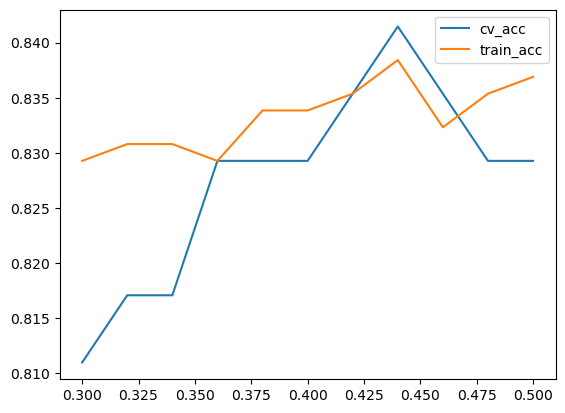

In [24]:
plt.plot(list,acc)
plt.legend(["cv_acc","train_acc"])

### best threshold value for classification is 0.44 beacause at this threshold train and cross validate accuracy is high

# Generalization 

In [25]:
y_pred_proba_test = clf1.predict_proba(x_test)
preds_test = np.where(y_pred_proba_test[:,1] > 0.44, 1, 0)
x = accuracy_score(y_test,preds_test)
print("Accuracy of Logistic Regression in test data",x)
print(pd.DataFrame(confusion_matrix(y_test,preds_test)))
print("Precision - ",precision_score(y_test,preds_test))
print("Recall - ",recall_score(y_test,preds_test))
print("F1 score - ",f1_score(y_test,preds_test))

Accuracy of Logistic Regression in test data 0.8341463414634146
    0   1
0  75  30
1   4  96
Precision -  0.7619047619047619
Recall -  0.96
F1 score -  0.8495575221238937


### accuracy on unseen data is 0.8341